# COGS 108 - Final Project

## Overview


In this project, I analyzed the relationships between inspector, days since last inspection, location and their possible effects on health inspection scores from a particular dataset. By plotting these variables against eachother, the graphs allow for the visual inspection for trends and skewness. Overall, no visible relationship between these variables was observed. 

# Name & GitHub

Name: Hanna Cabrera <br>
GitHub Username: hannacabrera

# Research Question

Does lower income locations, individual inspectors, and the time frame between last inspection effect health rating scores negatively?

# Background and Prior Work

   Upon further research into the Health Inspection process, I stumbled upon the abstract for a journal on the effects of inspection frequency and food handler education (4). To summarize, the journal came to the conclusion that "the optimal frequency of neither has been determined..." (4) however, it did find that violation scores worsened when inspections were farther than 12 months apart. With this, I started wondering if the span since last inspection visibly affected health inspection scores. To parallel this, I also wanted to see how time between last inspection effected the number of critical points recieved during the inspection. Upon looking further into the scoring process, it seems there are tiers to health point deductions depending on the infraction(1). It would be interesting to see the temporal effect on major infractions recieved(2). 

   Along with the span between inspections, I wondered if inspector bias was possible. Maybe different neighborhoods could invoke this bias, thus tacking on the location portion of my research question. In a research study by Lee, Nelson, et al. it was found that "inspector and operation type significantly impacted inspection scores"(3). Going under the broad term of location and the variables that go with it, I wondered if lower income areas were graded harsher than higher ones. 
    
   Bringing all three variables together, I want to then explore overall, the effect of all three variables at once.

References (include links) <br>
 - 1)https://www.mecknc.gov/HealthDepartment/EnvironmentalHealth/FoodserviceandFacilities/Documents/DENR4007.pdf

 - 2)https://www.sandiegocounty.gov/content/dam/sdc/deh/fhd/food/pdf/publications_opguide.pdf 
 
 - 3)https://www.sciencedirect.com/science/article/abs/pii/S0278431911001198?via%3Dihub
 
 - 4)https://europepmc.org/article/med/7728716 

# Hypothesis

I hypothesize that the inspector and location will heavily effect overall health inspection scores, but not the days since last inspection. I predict this because looking at the Canadian Journal of Public Health article, their study showed a lack of a clear optimal frequency of inspection(4). Thus making me assume the same may occur here. Inspector and location wise, I do think there will be detectable changes to the health inspection scores recieved. Specifically, in the negative direction for restauraunts located in lower income areas versus wealthier ones. I think there will be some variation in inspectors' scoring as well due to the natural differences between people and possible implicit bias.

# Dataset(s)

 - Dataset Name:Inspections.csv
    
 - Link to the Dataset: https://canvas.ucsd.edu/courses/12630/files?preview=1639871

 - Number of Observations: (prior to data cleaning) (18466, 36) (rows X columns)
   
This data set holds information on the specific restaurant and its last inspection. Will be helpful in looking at the effects of days since last inspection and inspector in relation to score.



 - Dataset Name:zipcodes.csv
    
 - Link to the Dataset: https://canvas.ucsd.edu/courses/12630/files?preview=1639871

 - Number of Observations: (prior to data cleaning) (38, 8) (rows X columns)
 
This data set holds information about various different zipcodes, including income and population. It will be used in conjunction with inspections_df to further examine the effects of location on scoring.


All together, these data sets will be used to further inspect the relation between location, inspector, and score. 

# Setup

In [1]:
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')


%config InlineBackend.figure_format ='retina'

import scipy.stats

In [2]:
inspections_df = pd.read_csv('inspections.csv')

zipcodes_df=pd.read_csv('zipcodes.csv')


In [3]:
inspections_df

,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,...,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,NaN,raleigh,NC,27610,(919) 255-9556,2004-05-04T00:00:00Z,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,STE 126,raleigh,NC,27610,(919) 773-2285,2008-08-04T00:00:00Z,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,NaN,cary,NC,27513,NaN,2012-03-28T00:00:00Z,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,841 E Gannon AVE,NaN,zebulon,NC,27597,(919) 269-2221 ext. 304,2008-02-25T00:00:00Z,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18461,4092021142,2016-11-03T00:00:00Z,Sino Wok,5959-1108 Triangle Town Blv,NaN,raleigh,NC,27616,(919) 792-2499,2002-08-19T00:00:00Z,...,13,1.0,4.0,1.000000,4.777778,4.692525,9.863838,4.092022e+09,4.092017e+09,1
18462,4092110100,2016-11-03T00:00:00Z,Weatherstone Elem. Sch. Cafeteria,1000 Olde Weatherstone Way,NaN,cary,NC,27513,(919) 380-6985,1995-09-05T00:00:00Z,...,3,2.0,5.0,0.750000,3.250000,5.853333,5.972381,4.092013e+09,4.092016e+09,1
18463,4092110487,2016-11-03T00:00:00Z,ALSTON RIDGE ELEMENTARY SCHOOL CAFETERIA,11555 GREEN LEVEL CHURCH RD,NaN,cary,NC,27519,NaN,2009-11-13T00:00:00Z,...,4,0.0,2.0,0.875000,1.750000,2.466667,3.000000,4.092017e+09,4.092015e+09,1
18464,4092300177,2016-11-03T00:00:00Z,Food Lion #996 Meat Market,7971 FAYETTEVILLE RD,NaN,raleigh,NC,27603-5631,(919) 772-0317,2000-07-01T00:00:00Z,...,2,0.0,3.0,1.111111,2.000000,3.737302,4.606349,4.092016e+09,4.092015e+09,1


In [4]:
zipcodes_df

,zip,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_damilies_below_poverty_line,percent_snap_benefits,percent_supplemental_security_income,percent_nonwhite
0,27501,59408,51121,21631,10.5,15.5,5.2,17.9
1,27502,109891,95857,36763,3.4,2.4,0.8,18.9
2,27511,82292,67392,33139,9.6,4.5,2.2,24.8
3,27513,109736,87262,41232,3.8,2.4,1.5,27.8
4,27518,125432,98247,49865,5.5,1.0,1.7,19.9
5,27519,137193,121815,45778,3.2,2.3,2.3,35.2
6,27520,67939,58455,25628,5.0,7.8,2.4,23.5
7,27522,66250,59221,25513,6.0,7.0,4.2,31.4
8,27523,89184,68342,36976,3.1,3.1,1.8,22.4
9,27526,74666,66025,28074,8.4,8.3,3.9,22.5


# Data Cleaning

Start off cleaning inspections_df
 - remove unique identifiers
 - specify which data we wanted to see specifically
 - remove columns that arent needed for analysis
 - rename some of the columns

In [5]:
##for the inspections data, drop any unique identifiers
inspections_df=inspections_df.drop(['name','address1','address2','phonenumber'], axis=1)
##also drop any row that isn't of restaurant type
indexNotRestaurant = inspections_df[ inspections_df['facilitytype'] != 'Restaurant' ].index
inspections_df.drop(indexNotRestaurant , inplace=True)
##now we know we only have restaurants, can remove that column in general
inspections_df=inspections_df.drop(['facilitytype'],axis=1)
#remove any data we won't use for our purposes
inspections_df = inspections_df.drop(['restaurantopendate', 'x', 'y', 'geocodestatus', 'num_non_critical','num_critical_previous', 'num_critical_mean_previous', 'num_non_critical_mean_previous', 'avg_neighbor_num_critical','avg_neighbor_num_non_critical', 'top_match'], axis = 1)
inspections_df=inspections_df.drop(['type','previous_inspection_date', 'previous_inspection_by_same_inspector', 'state'], axis=1)
inspections_df=inspections_df.drop(['city','postalcode', 'description', 'inspector_id', 'second_match'], axis=1)
##Drop places that have not had more than one inspection already
##want to be able to compare to previous inspections
index_one_inspec = inspections_df[ inspections_df['inspection_num'] <= 1 ].index
inspections_df.drop(index_one_inspec , inplace=True)
inspections_df
#change the column names to be shorter
inspections_df.columns = ['id','date', 'days_opened', 'zip', 'inspector','num_of_inspecs', 'days_since_last_inspec', 'score','prev_num_critical_points','num_non_critical_prev','critical_points'] 
inspections_df

,id,date,days_opened,zip,inspector,num_of_inspecs,days_since_last_inspec,score,prev_num_critical_points,num_non_critical_prev,critical_points
496,4092013936,2012-11-19T00:00:00Z,3297,27502,Andrea Anover,2,46.0,96.5,5,4.0,1
652,4092016126,2012-12-05T00:00:00Z,253,27502,Andrea Anover,2,58.0,96.0,4,6.0,1
828,4092015656,2012-12-21T00:00:00Z,905,27511,David Adcock,2,87.0,98.0,1,4.0,1
854,4092016210,2013-01-02T00:00:00Z,191,27610,Lisa McCoy,2,70.0,97.5,3,3.0,1
892,4092016261,2013-01-07T00:00:00Z,111,27539,Andrea Anover,2,97.0,98.5,6,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...
18453,4092015590,2016-11-03T00:00:00Z,2415,27539,Ginger Johnson,9,281.0,93.5,2,4.0,1
18454,4092016479,2016-11-03T00:00:00Z,1189,27695,Caroline Suggs,8,147.0,97.0,3,3.0,1
18455,4092016866,2016-11-03T00:00:00Z,637,27513,Andrea Anover,5,205.0,97.0,3,6.0,1
18456,4092016949,2016-11-03T00:00:00Z,514,27603,Christy Klaus,4,168.0,96.0,3,2.0,1


Check to be aware if there are any null values in the inspections dataset.

In [6]:
##check if there are null values in any of the rows
null_rows = inspections_df.isnull().any(axis=1)
inspections_df[null_rows].shape

(1, 11)

In [7]:
##check for null values in the columns
inspections_df.columns[inspections_df.isnull().any(axis=0)]

Index(['inspector'], dtype='object')

In [8]:
inspections_df.isnull().sum()

id                          0
date                        0
days_opened                 0
zip                         0
inspector                   1
num_of_inspecs              0
days_since_last_inspec      0
score                       0
prev_num_critical_points    0
num_non_critical_prev       0
critical_points             0
dtype: int64


To make sure we are analyzing similar data, I removed rows that couldn't be found in both dataframes. In this case, the zipcodes that couldn't be found in both inspections_df and zipcodes_df were removed.

In [9]:
print(len(inspections_df))
inspections_df = inspections_df[inspections_df['zip'].isin(list(zipcodes_df['zip']))]
print(len(inspections_df))
print(len(zipcodes_df))
zipcodes_df = zipcodes_df[zipcodes_df['zip'].isin(list(inspections_df['zip']))]
print(len(zipcodes_df))

9932
9838
38
35


Here, I removed the inspectors' names and replaced them with an integer to represent a different inspector. This is necessary to make the analysis ethical.

In [10]:
##get rid of inspectors' actual names
unique_inspectors = inspections_df['inspector'].unique()

inspectors = inspections_df['inspector']
def hide_name(inspector):
    index = np.where(unique_inspectors == inspector)
    return index[0][0] if len(index[0]) > 0 else 9999
inspectors = inspectors.apply(hide_name)
inspections_df['inspector'] = inspectors
inspections_df = inspections_df[inspections_df['inspector'] != 9999]


Obscuring the unique identifier of id from inspections_df to ensure ethical analysis. Obscured by removing the first four digits.

In [11]:
t = inspections_df['zip']
def obscure_zip(zip):
    return int(str(zip)[2:])
t = t.apply(obscure_zip)
inspections_df['zip'] = t

Obscuring the unique identifier of zipcode by removing the first two digits.

In [12]:
t = inspections_df['id']
def obscure_id(id):
    return int(str(id)[5:])
t = t.apply(obscure_id)
inspections_df['id'] = t


In [13]:
inspections_df

,id,date,days_opened,zip,inspector,num_of_inspecs,days_since_last_inspec,score,prev_num_critical_points,num_non_critical_prev,critical_points
496,13936,2012-11-19T00:00:00Z,3297,502,0,2,46.0,96.5,5,4.0,1
652,16126,2012-12-05T00:00:00Z,253,502,0,2,58.0,96.0,4,6.0,1
828,15656,2012-12-21T00:00:00Z,905,511,1,2,87.0,98.0,1,4.0,1
854,16210,2013-01-02T00:00:00Z,191,610,2,2,70.0,97.5,3,3.0,1
892,16261,2013-01-07T00:00:00Z,111,539,0,2,97.0,98.5,6,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...
18452,14979,2016-11-03T00:00:00Z,3300,607,18,12,192.0,97.0,0,3.0,0
18453,15590,2016-11-03T00:00:00Z,2415,539,27,9,281.0,93.5,2,4.0,1
18455,16866,2016-11-03T00:00:00Z,637,513,0,5,205.0,97.0,3,6.0,1
18456,16949,2016-11-03T00:00:00Z,514,603,19,4,168.0,96.0,3,2.0,1


Clean zipcodes_df.
 - obscure the unique identifier of zipcode by removing the first two digits
 - drop unnecessary columns

In [14]:
t = zipcodes_df['zip']
def obscure_zip(zip):
    return int(str(zip)[2:])
t = t.apply(obscure_zip)
zipcodes_df['zip'] = t

In [15]:
zipcodes_df=zipcodes_df.drop(['percent_supplemental_security_income','percent_snap_benefits','per_capita_income_dollars'], axis=1)


In [16]:
zipcodes_df

,zip,median_family_income_dollars,median_household_income_dollars,percent_damilies_below_poverty_line,percent_nonwhite
0,501,59408,51121,10.5,17.9
1,502,109891,95857,3.4,18.9
2,511,82292,67392,9.6,24.8
3,513,109736,87262,3.8,27.8
4,518,125432,98247,5.5,19.9
5,519,137193,121815,3.2,35.2
6,520,67939,58455,5.0,23.5
8,523,89184,68342,3.1,22.4
9,526,74666,66025,8.4,22.5
10,529,68627,59613,9.5,33.9


Here, I created a new data frame that combined zipcodes_df and inspections_df on the cpolumn 'zip'. Therefore, attatched to each row will now be more information on that specific zipcode. So, this merge doesn't necessarily relate to the specific restaurant rather it provides more characteristics about the area itself in which the restaurant is located. This is important for later analysis into how location may affect health inspection scores.

In [17]:
left = inspections_df
right = zipcodes_df
merged_zip_inspec_df = pd.merge(left, right, on='zip')
merged_zip_inspec_df

,id,date,days_opened,zip,inspector,num_of_inspecs,days_since_last_inspec,score,prev_num_critical_points,num_non_critical_prev,critical_points,median_family_income_dollars,median_household_income_dollars,percent_damilies_below_poverty_line,percent_nonwhite
0,13936,2012-11-19T00:00:00Z,3297,502,0,2,46.0,96.5,5,4.0,1,109891,95857,3.4,18.9
1,16126,2012-12-05T00:00:00Z,253,502,0,2,58.0,96.0,4,6.0,1,109891,95857,3.4,18.9
2,12834,2013-01-28T00:00:00Z,5187,502,0,2,119.0,94.0,7,7.0,1,109891,95857,3.4,18.9
3,14456,2013-01-30T00:00:00Z,2591,502,8,2,16.0,96.5,3,9.0,1,109891,95857,3.4,18.9
4,15179,2013-03-01T00:00:00Z,1683,502,0,2,156.0,96.5,5,6.0,1,109891,95857,3.4,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,16628,2014-10-03T00:00:00Z,218,501,0,2,140.0,92.0,10,4.0,1,59408,51121,10.5,17.9
9833,16628,2015-06-03T00:00:00Z,461,501,0,3,243.0,93.0,8,4.0,1,59408,51121,10.5,17.9
9834,16628,2015-12-09T00:00:00Z,650,501,0,4,189.0,94.5,8,6.0,1,59408,51121,10.5,17.9
9835,16628,2016-03-30T00:00:00Z,762,501,0,5,112.0,97.5,2,7.0,1,59408,51121,10.5,17.9


# Data Analysis & Results

Starting off, I want to see/display the general plots of our variables of interest including some measurements of central tendency.
 - This first plot is the density plot of health inspection scores from inspections_df. It shows a left skewed distribution of health inspection scores. With a mean of 95.5 and a median of 96.0.

mean = 95.52327945511843
median = 96.0


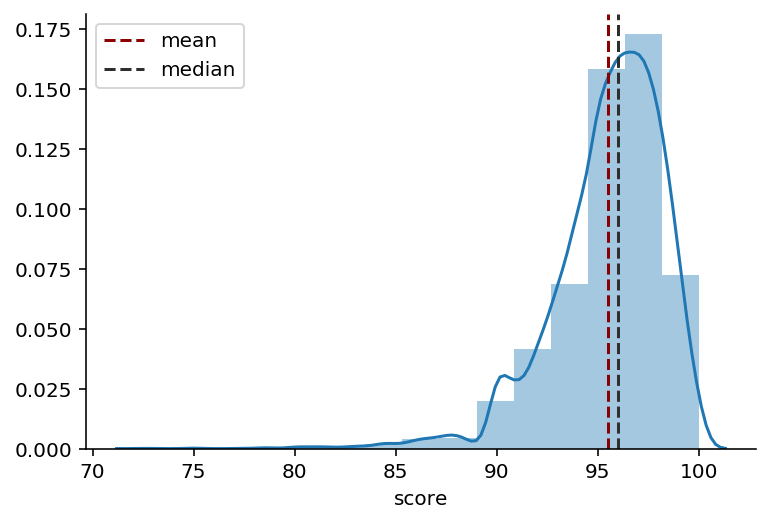

In [18]:
a=sns.distplot(inspections_df['score'], bins=15);
a.axvline(inspections_df['score'].mean(), color='darkred', linestyle='--', label='mean');
a.axvline(inspections_df['score'].median(), color='#2e2e2e', linestyle='--', label='median')
print('mean = ' + str(inspections_df['score'].mean()))
print('median = ' + str(inspections_df['score'].median()))
a.legend();
sns.despine()

 - This plot shows the same information as above, but in a different form. It clearly shows the general range to be around 90 to 100.

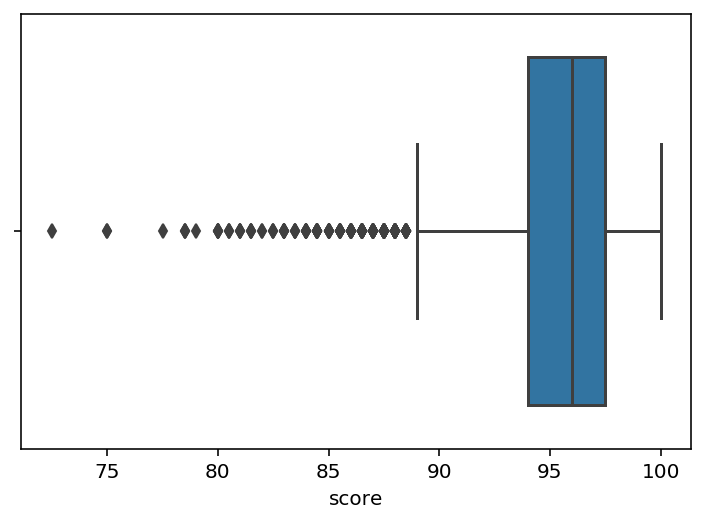

In [19]:
sns.boxplot(x = inspections_df['score'])

 - This next plot is to find/show the average time span since last inspection. It appears slightly right skewed, with a mean of 198.6, and a median of 186.0.

mean = 198.56673782657313
median = 186.0


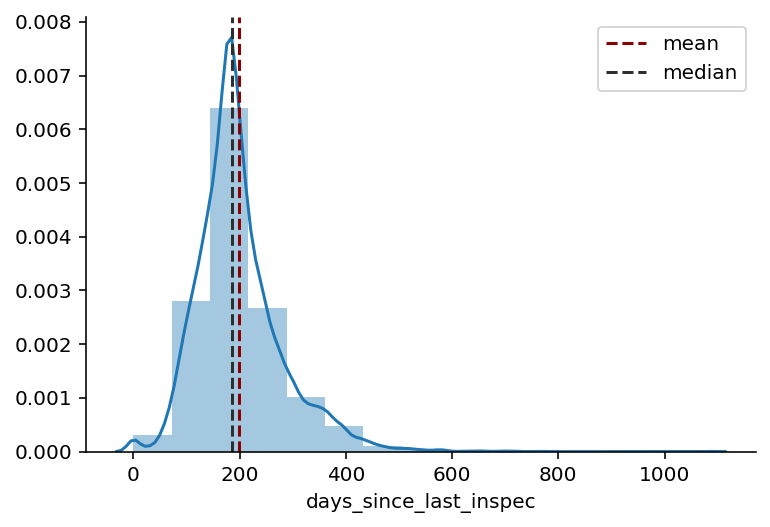

In [20]:
b=sns.distplot(inspections_df['days_since_last_inspec'], bins=15);
b.axvline(inspections_df['days_since_last_inspec'].mean(), color='darkred', linestyle='--', label='mean');
b.axvline(inspections_df['days_since_last_inspec'].median(), color='#2e2e2e', linestyle='--', label='median')
print('mean = '+ str(inspections_df['days_since_last_inspec'].mean()))
print('median = ' + str(inspections_df['days_since_last_inspec'].median()))
b.legend();
sns.despine()

 -To break down the values below, we need to first digest it step by step
   - First, we found the mean column values based on inspector. This means inspector becomes the indexes and the column values represent the mean value for that specific inspector. So for 'score', all the score values for an individual inspector is averaged out. Thus, the max score is the highest average score given by a inspector. The minimum is the same in reverse. This is important to look at to better illustrate the maximum range between inspectors' scoring. 
     - The average max score was 97.58
     - The average min score was 92.71
   - I also went ahead and printed out the normal mean for scores- not the averaged averaged one by inspector. Just to see how it compares.
     - The mean score overall (not inspector specific) was 95.52
   - I did this same thing for standard deviation as well.
     - The standard deviation was 2.75

In [21]:
inspectors_scores_average_max= inspections_df.groupby('inspector').agg('mean')['score'].max()
inspectors_scores_average_min= inspections_df.groupby('inspector').agg('mean')['score'].min()
print('inspectors average max = ' + str(inspectors_scores_average_max))
print('inspectors average min = ' + str(inspectors_scores_average_min))
scores_mean = inspections_df['score'].mean()
print('mean = ' + str(scores_mean))
scores_sd=inspections_df['score'].std()
print('standard deviation = ' + str(scores_sd))
print(inspections_df['score'].shape)
count = 9837

inspectors average max = 97.58319185059423
inspectors average min = 92.7072072072072
mean = 95.52327945511843
standard deviation = 2.7544220980863443
(9837,)


 - The visual below helps depict the relationship between score and inspector that we were interested in discussing. The average inspection score appears to be similar across the board regardless of inspector. 

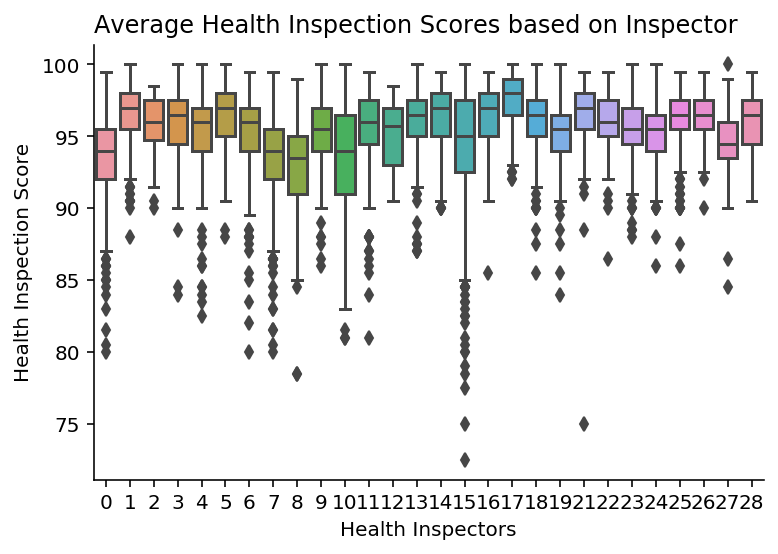

In [22]:
ax = sns.boxplot(x='inspector', y='score', data=inspections_df)

ax.set_title('Average Health Inspection Scores based on Inspector', loc='left')
ax.set_ylabel('Health Inspection Score')
ax.set_xlabel('Health Inspectors');
sns.set(font_scale=.5, style="white")
sns.despine()

 - Next, I wanted to look further into how the location of these restaurants may effect health inspection reviews. To further investigate the location, I used the zipcode, the median family income in dollars of those zipcodes, and also the percent nonwhite that zipcode was. This visual isn't really to draw any connections, rather just to give context. The x-axis is the zipcode.

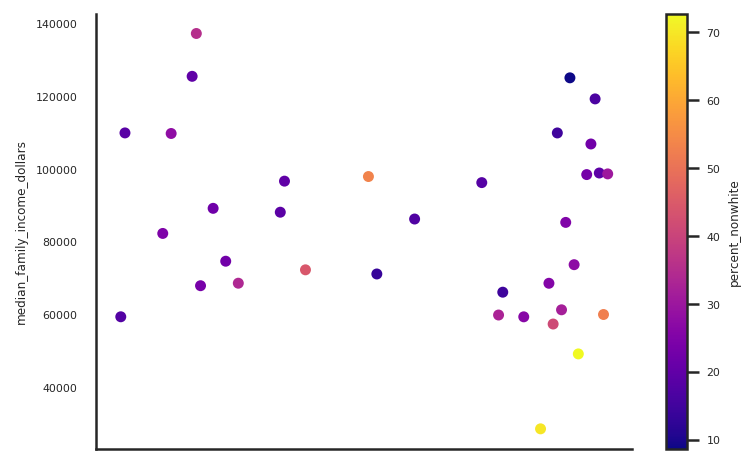

In [23]:
ax=zipcodes_df.plot.scatter(x='zip',
                      y='median_family_income_dollars',
                        c = 'percent_nonwhite',
                        colormap = 'plasma')

sns.set(font_scale=1.0, style="white")
sns.despine()

 - Looking further into how the location and it's characteristics may relate to health inspection score, I plotted median family income in dollars on the x axis against the health inspection scores on the y axis with the color of the dot being related to the percentage of the percentage of nonwhite people that correspond to that location. According to my hypothesis, I was expecting to see health inspection scores possibly be lower in the lower income communities and greater percent nonwhite due to possible implicit bias in inspectors. However, this doesn't appear to be the case. If anything- it may be the middle level is where a slight dip may be visible. 

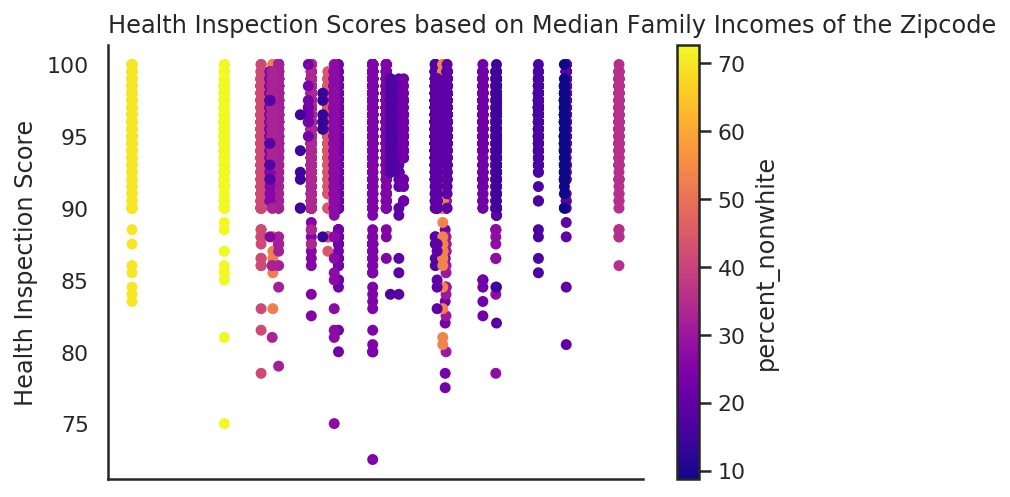

In [24]:
ax=merged_zip_inspec_df.plot.scatter(x='median_family_income_dollars',
                      y='score', c='percent_nonwhite', colormap='plasma')
ax.set_title('Health Inspection Scores based on Median Family Incomes of the Zipcode', loc='left')
ax.set_ylabel('Health Inspection Score')
ax.set_xlabel('Median Family Income in Dollars');
sns.set(font_scale=1.0, style="white")
sns.despine()

 - To further pursue the relationship between location and inspector, I thought to check if maybe the inspectors only inspected one general area instead of the full range of zipcodes. However, it appears that inspectors don't stick to only one or two few zipcodes. Rather below shows they have a pretty wide and overlapping range. The addition of median family income also helps show that one inspector doesn't tend to inspect just one financial level either. To be clear, the x-axis is by health inspectors (I couldn't make it show up). So, we can see for each individual health inspector what zipcodes have been reported of them inspecting and then also what the median family income was that corresponded to those zipcodes.

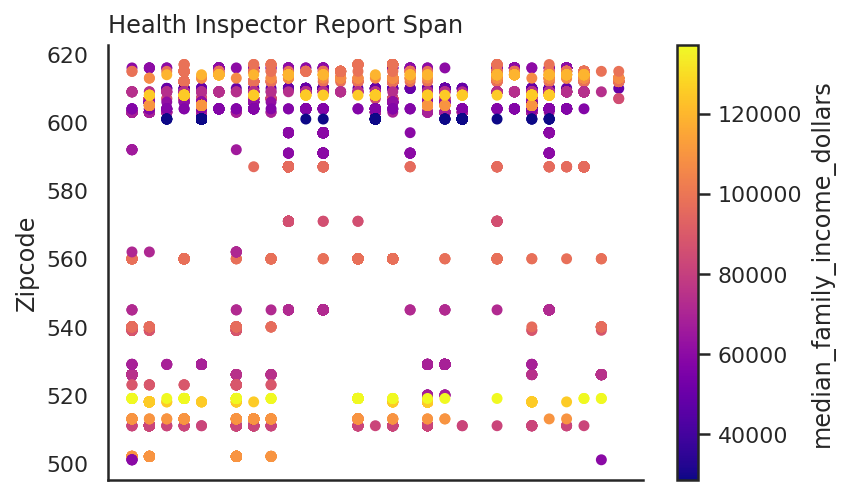

In [25]:
ax=merged_zip_inspec_df.plot.scatter(x='inspector',
                      y='zip', c='median_family_income_dollars', colormap = 'plasma')
ax.set_title('Health Inspector Report Span', loc='left')
ax.set_ylabel('Zipcode')
ax.set_xlabel('Health Inspector');
sns.set(font_scale=1.0, style="white")
sns.despine()

 - Now knowing that health inspector don't just inspect one or few main areas, I wanted to see if their lower given scores were given at restaurants in lower income places.  
 - Overall, that doesn't seem to be the case. As we can see below, the color of each score is very mixed, but there isn't any major visible shows of darker point (which signifies lower income) equating to lower scores. However, it would be interesting to look into further detail of inspector 15's ratings since it seems to stand out the most and drag the farthest down.

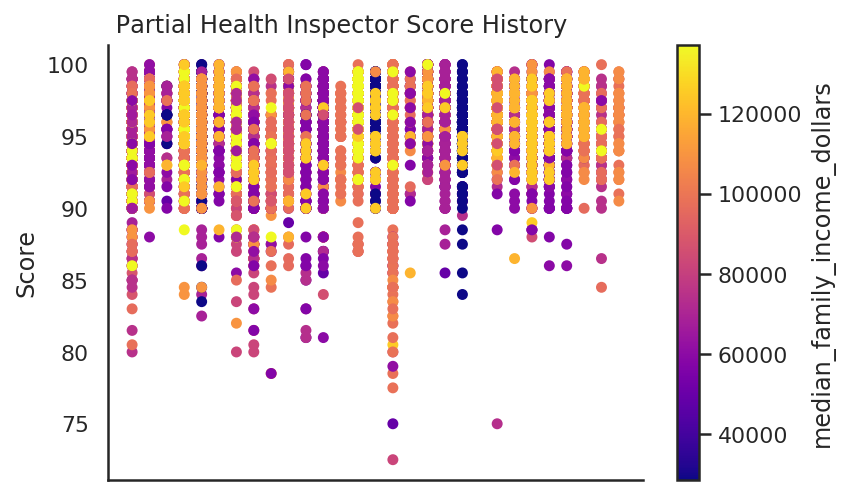

In [26]:
ax=merged_zip_inspec_df.plot.scatter(x='inspector',
                      y='score', c='median_family_income_dollars', colormap = 'plasma')
ax.set_title(' Partial Health Inspector Score History',loc='left')
ax.set_ylabel('Score')
ax.set_xlabel('Health Inspector');
sns.set(font_scale=1.0, style="white")
sns.despine()

 - Below is just a quick visual to see further into inspector 15. We can see that the mean and median are both lower than the mean (95.5) and median (96.0) score of the full dataset which was depicted above. However, it's still within one standard deviation (2.75) of the mean, so it's not necessarily noteworthy to further inspect.

mean = 94.51079136690647
median = 95.0


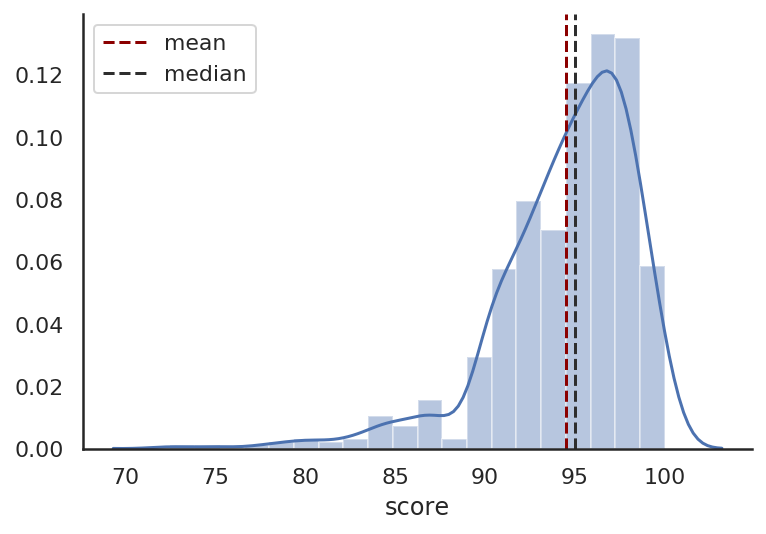

In [27]:
inspector14 = merged_zip_inspec_df[merged_zip_inspec_df.inspector == 15]
c=sns.distplot(inspector14['score'], bins=20);
c.axvline(inspector14['score'].mean(), color='darkred', linestyle='--', label='mean');
c.axvline(inspector14['score'].median(), color='#2e2e2e', linestyle='--', label='median')
print('mean = ' + str(inspector14['score'].mean()))
print('median = ' + str(inspector14['score'].median()))
c.legend();
sns.despine()

So up to now, we have taken a look at the relationships between inspector and score, score and median family income/zipcode, and inspector and median family income/zipcode. This tackles the question of how location and inspector may effect the score. On to the last variable- days since last inspection. 

 - Looking at the visual below We see yet again that there doesn't seem to be any obvious relation between days since last inspection and score. What was expected was that sooner after the last inspection scores would be higher and then the farther out, scores would be lower. Here however, The range of scores seems pretty average regardless of time span. Suggesting there is little to no relationship between time span and inspection score.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


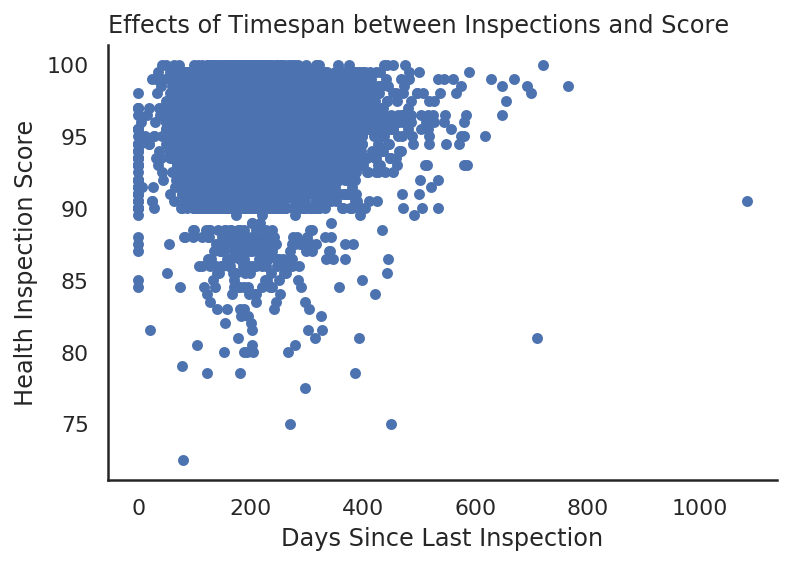

In [28]:
ax=inspections_df.plot.scatter(x='days_since_last_inspec',
                      y='score')
ax.set_title('Effects of Timespan between Inspections and Score',loc='left')
ax.set_xlabel('Days Since Last Inspection')
ax.set_ylabel('Health Inspection Score');
sns.set(font_scale=1.0, style="white")
sns.despine()

To gather all of these main ideas in to one chart, the variables 'inspector', 'meadian_family_income_dollars', 'score', and 'days_since_last_inspec' were plotted below in the scatter matrix. Although I would say this isn't the best visualization to truly understand all the relationships at once, I do think it proves useful when taking a little more time and looking at each relationship.


Overall, there appears to be very little movement of score based on the other variables. 
It was hypothesized that score could be directly effected by who the inspector was, by the location of the restaurant and its influences of income and racial diversity, and or by the time frame since the last inspection. This however makes score appear relatively constant in its distribution regardless of these other variables. 

Regardless of the other variable, score appears to constantly be concentrated within a range of about 90 - 100

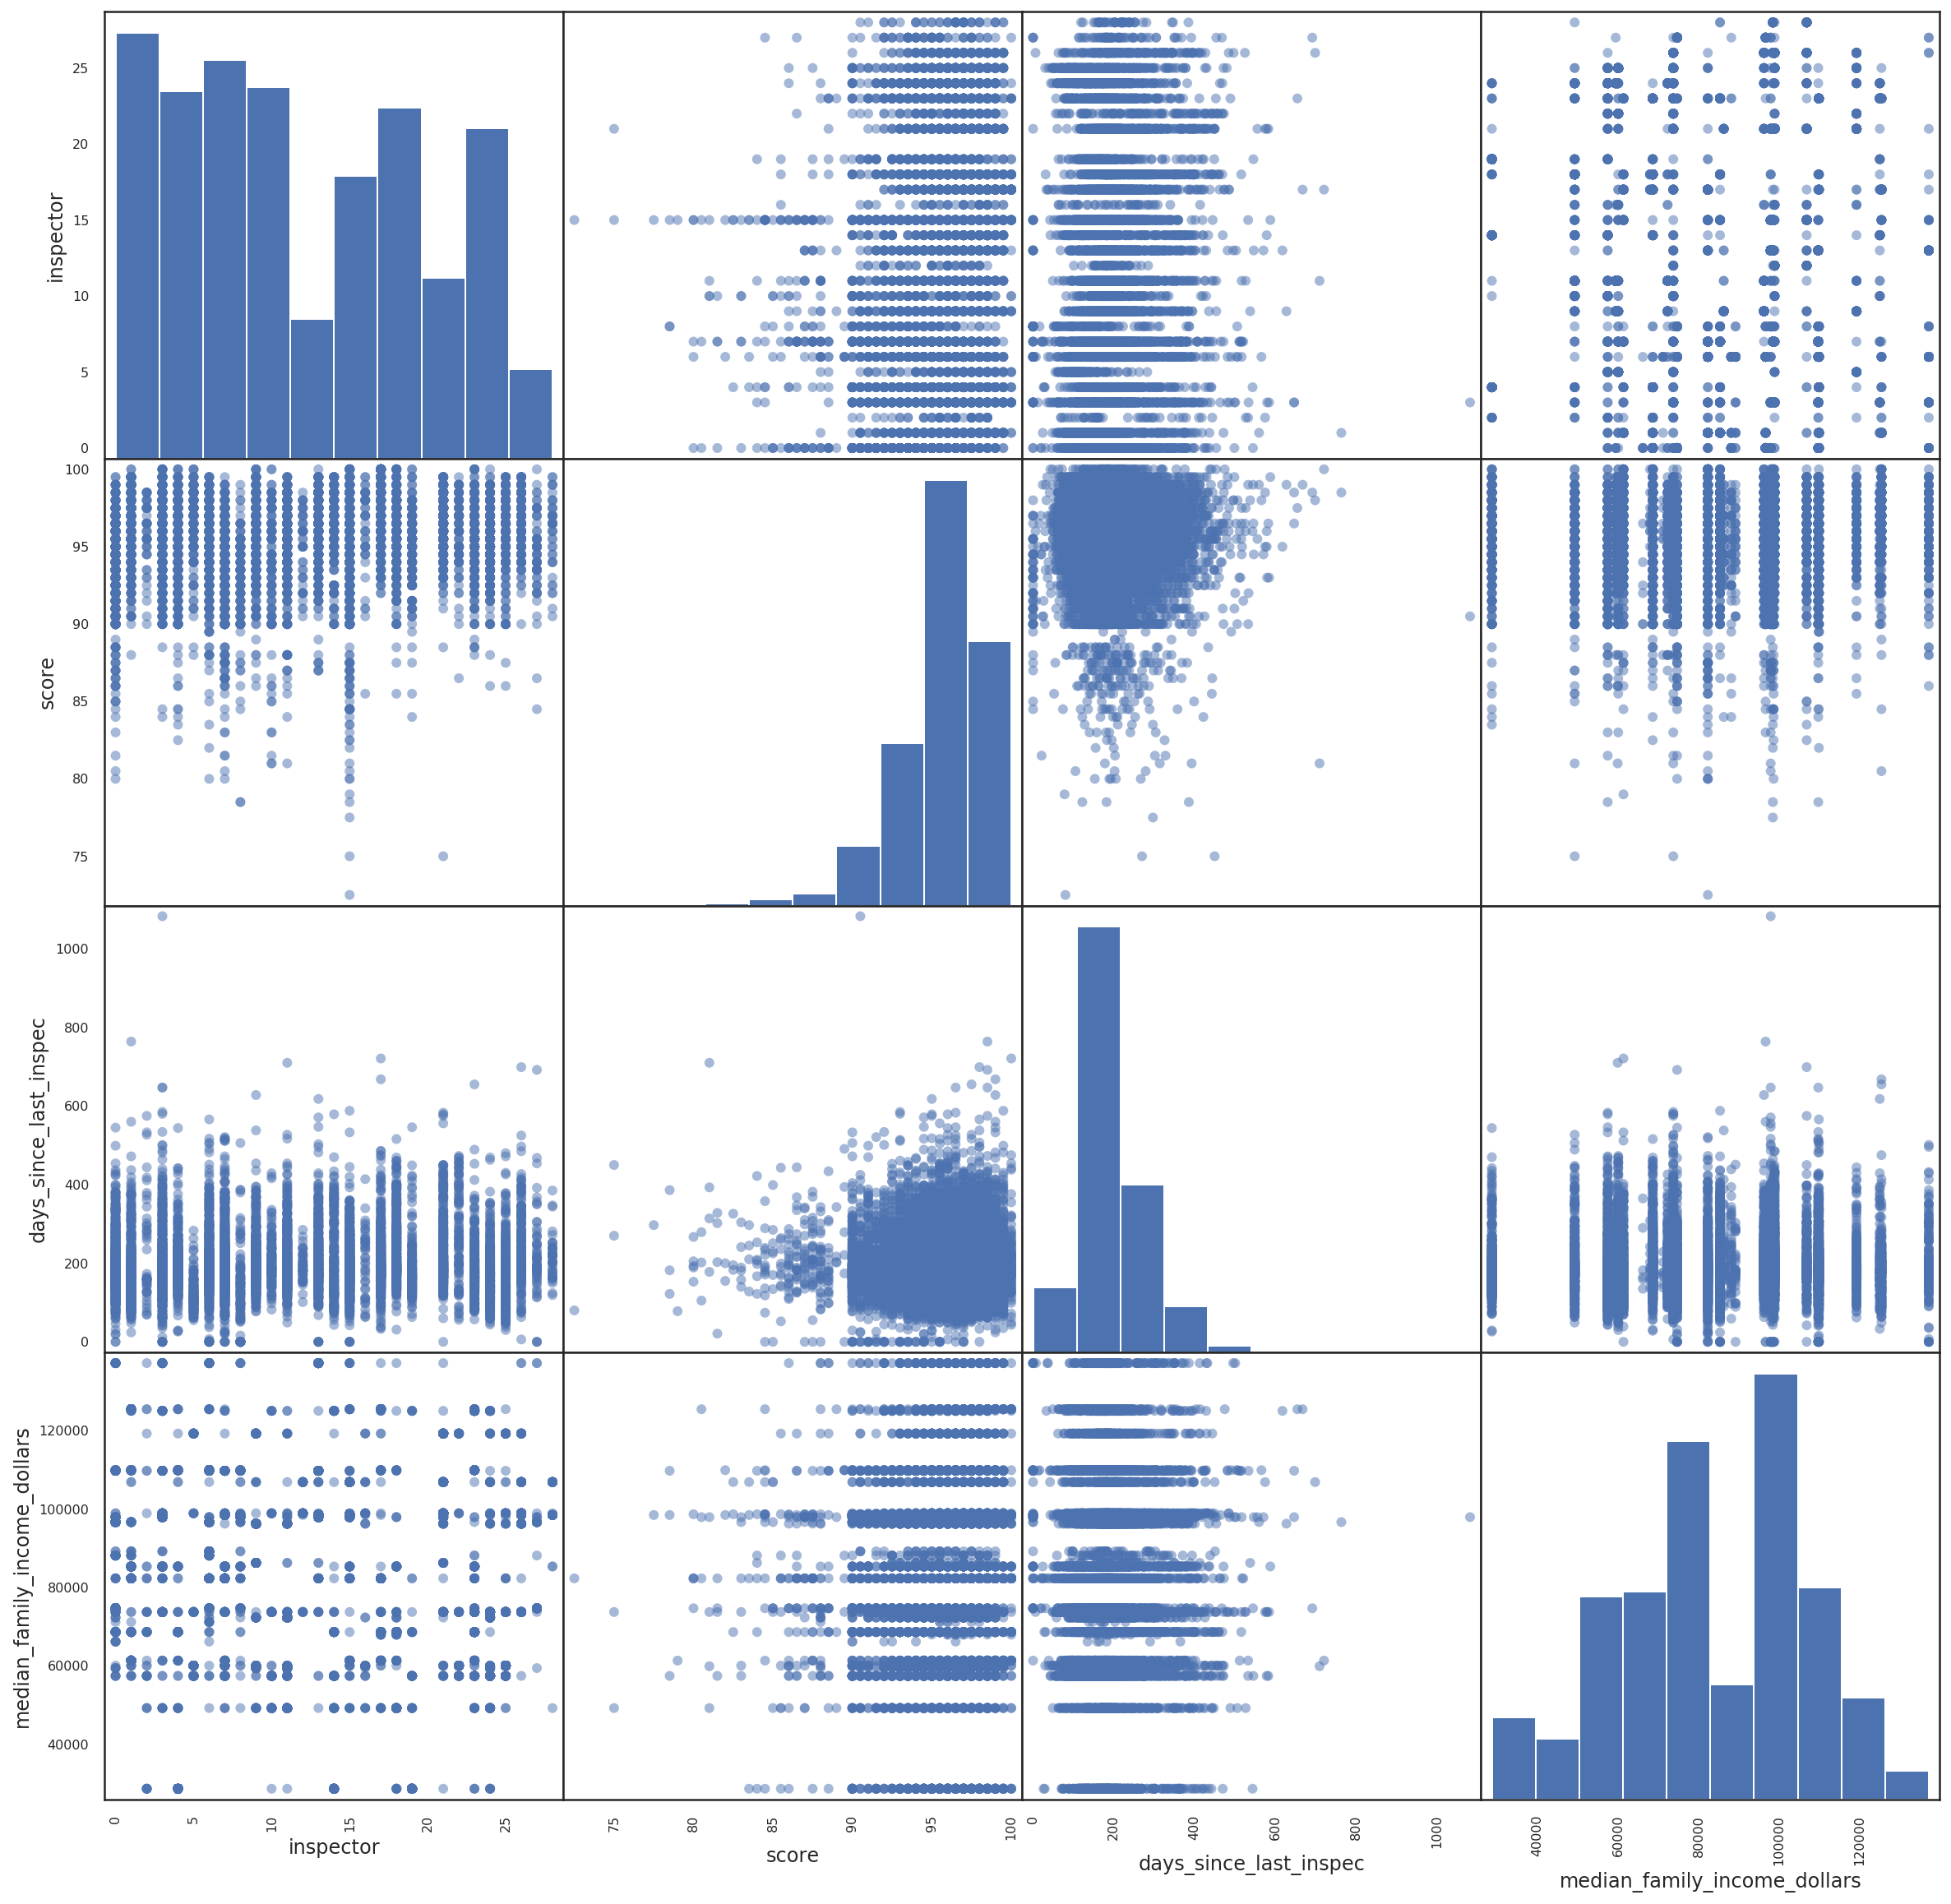

In [29]:
pd.plotting.scatter_matrix(merged_zip_inspec_df[['inspector', 'score', 'days_since_last_inspec', 'median_family_income_dollars']], figsize=[20, 20], marker=12); 

# Ethics & Privacy

Upon data cleaning, I found there to be a lot of issues necessary to clean in order to not have uniques identifiers or to give away specific information. To ensure anonymity, I did change the inspector ID, the restaurant inspection id, and the zipcodes.
Also, I don't think this data could be used against any sector of our population, seeing as it's findings show no visible relation. Privacy wise, without cleaning the data first, privacy wouldn't have been granted. However, I think I did a pretty sufficient job at obscurring identifiable information.

Ethically, I think trying to address possible inspector bias by factors held with location may be questionable. Especially since my only variables available to handle this was average family income and then the demographic of the percent nonwhite in these zipcodes. However, witht he current sociocultural situation of today, I thought it would be interesting to see if any implicit bias may have been present in this data. Although I can neither prove nor disprove anything, it appears as if there is minimal to no relationship with regards to these specific variables. 

# Conclusion & Discussion

To conclude, as discussed previously, there appears to be no driving relationship between score, inspector, time frame between inspections, and location(defined by zipcode and its properties). Across all fields, the main concentration of scores appeared to be around 90 - 100. Initially, wiht my hypothesis, I predicted scores to vary by inspector, but the graphs showed that each inspector individually also stayed within that average span. I also predicted that lower scores would come from restaurant in lower income locations, and vice versa with high scores and high incomes. However, we saw this also didn't appear to be the case, with scores again maintaining their average span. For time span between inspections, I expected sooner inspections to result in higher scores, and later to recieve lower. Again, this didn't visibly appear so. This analysis is limited to the specific data given and can not be extrapolated past this.

Summing it up, there appears to be little to no relationship between score, inspector, time frame between inspections, and location. 